In [1]:
import pandas as pd
import numpy as np

In [2]:
from data.loader import QSARData
data_loader = QSARData()
data_loader.load_and_process()
data = data_loader._data
#data = pd.read_csv("data/qsar/biodeg.csv", header=None, sep=";")
data.head()

0       1   2   3   4   5   6     7   8   9  ...  32  33  34     35  \
0  3.919  2.6909   0   0   0   0   0  31.4   2   0 ...   0   0   0  2.949   
1  4.170  2.1144   0   0   0   0   0  30.8   1   1 ...   0   0   0  3.315   
2  3.932  3.2512   0   0   0   0   0  26.7   2   4 ...   0   0   1  3.076   
3  3.000  2.7098   0   0   0   0   0  20.0   0   2 ...   0   0   1  3.046   
4  4.236  3.3944   0   0   0   0   0  29.4   2   4 ...   0   0   0  3.351   

      36  37     38  39  40  41  
0  1.591   0  7.253   0   0   1  
1  1.967   0  7.257   0   0   1  
2  2.417   0  7.601   0   0   1  
3  5.000   0  6.690   0   0   1  
4  2.405   0  8.003   0   0   1  

[5 rows x 42 columns]

In [3]:
# Make the class values binary "RB"=1, "NRB"=0
#data.iloc[:,41] = np.where(data.iloc[:,41] == "RB", 1, 0)

In [4]:
data.describe()

0            1            2            3            4   \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      4.782644     3.069508     0.716588     0.042654     0.980095   
std       0.546916     0.831308     1.462452     0.256010     2.332955   
min       2.000000     0.803900     0.000000     0.000000     0.000000   
25%       4.481000     2.502750     0.000000     0.000000     0.000000   
50%       4.828000     3.046300     0.000000     0.000000     0.000000   
75%       5.125000     3.437650     1.000000     0.000000     1.000000   
max       6.496000     9.177500    12.000000     3.000000    36.000000   

                5            6            7            8            9   \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      0.290047     1.646445    37.055640     1.376303     1.803791   
std       1.073771     2.224822     9.144466     1.963521     1.775435   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    30.450000     0.000000     0.000000   
50%       0.000000     1.000000    37.500000     1.000000     2.000000   
75%       0.000000     3.000000    43.400000     2.000000     3.000000   
max      13.000000    18.000000    60.700000    24.000000    12.000000   

          ...                32           33           34           35  \
count     ...       1055.000000  1055.000000  1055.000000  1055.000000   
mean      ...          0.883412     1.274882     0.961137     3.918240   
std       ...          1.520467     2.273994     1.257013     0.999602   
min       ...          0.000000     0.000000     0.000000     2.267000   
25%       ...          0.000000     0.000000     0.000000     3.487500   
50%       ...          0.000000     0.000000     1.000000     3.726000   
75%       ...          1.000000     2.000000     2.000000     3.987000   
max       ...         12.000000    18.000000     7.000000    10.695000   

                36           37           38           39           40  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      2.558417     0.686256     8.629492     0.051185     0.723223   
std       0.642765     1.090389     1.241986     0.318970     2.239286   
min       1.467000     0.000000     4.917000     0.000000     0.000000   
25%       2.103000     0.000000     7.991000     0.000000     0.000000   
50%       2.458000     0.000000     8.499000     0.000000     0.000000   
75%       2.870500     1.000000     9.020500     0.000000     0.000000   
max       5.825000     8.000000    14.700000     4.000000    27.000000   

                41  
count  1055.000000  
mean      0.337441  
std       0.473061  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 42 columns]

# Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c88546e80>,
      dtype=object)

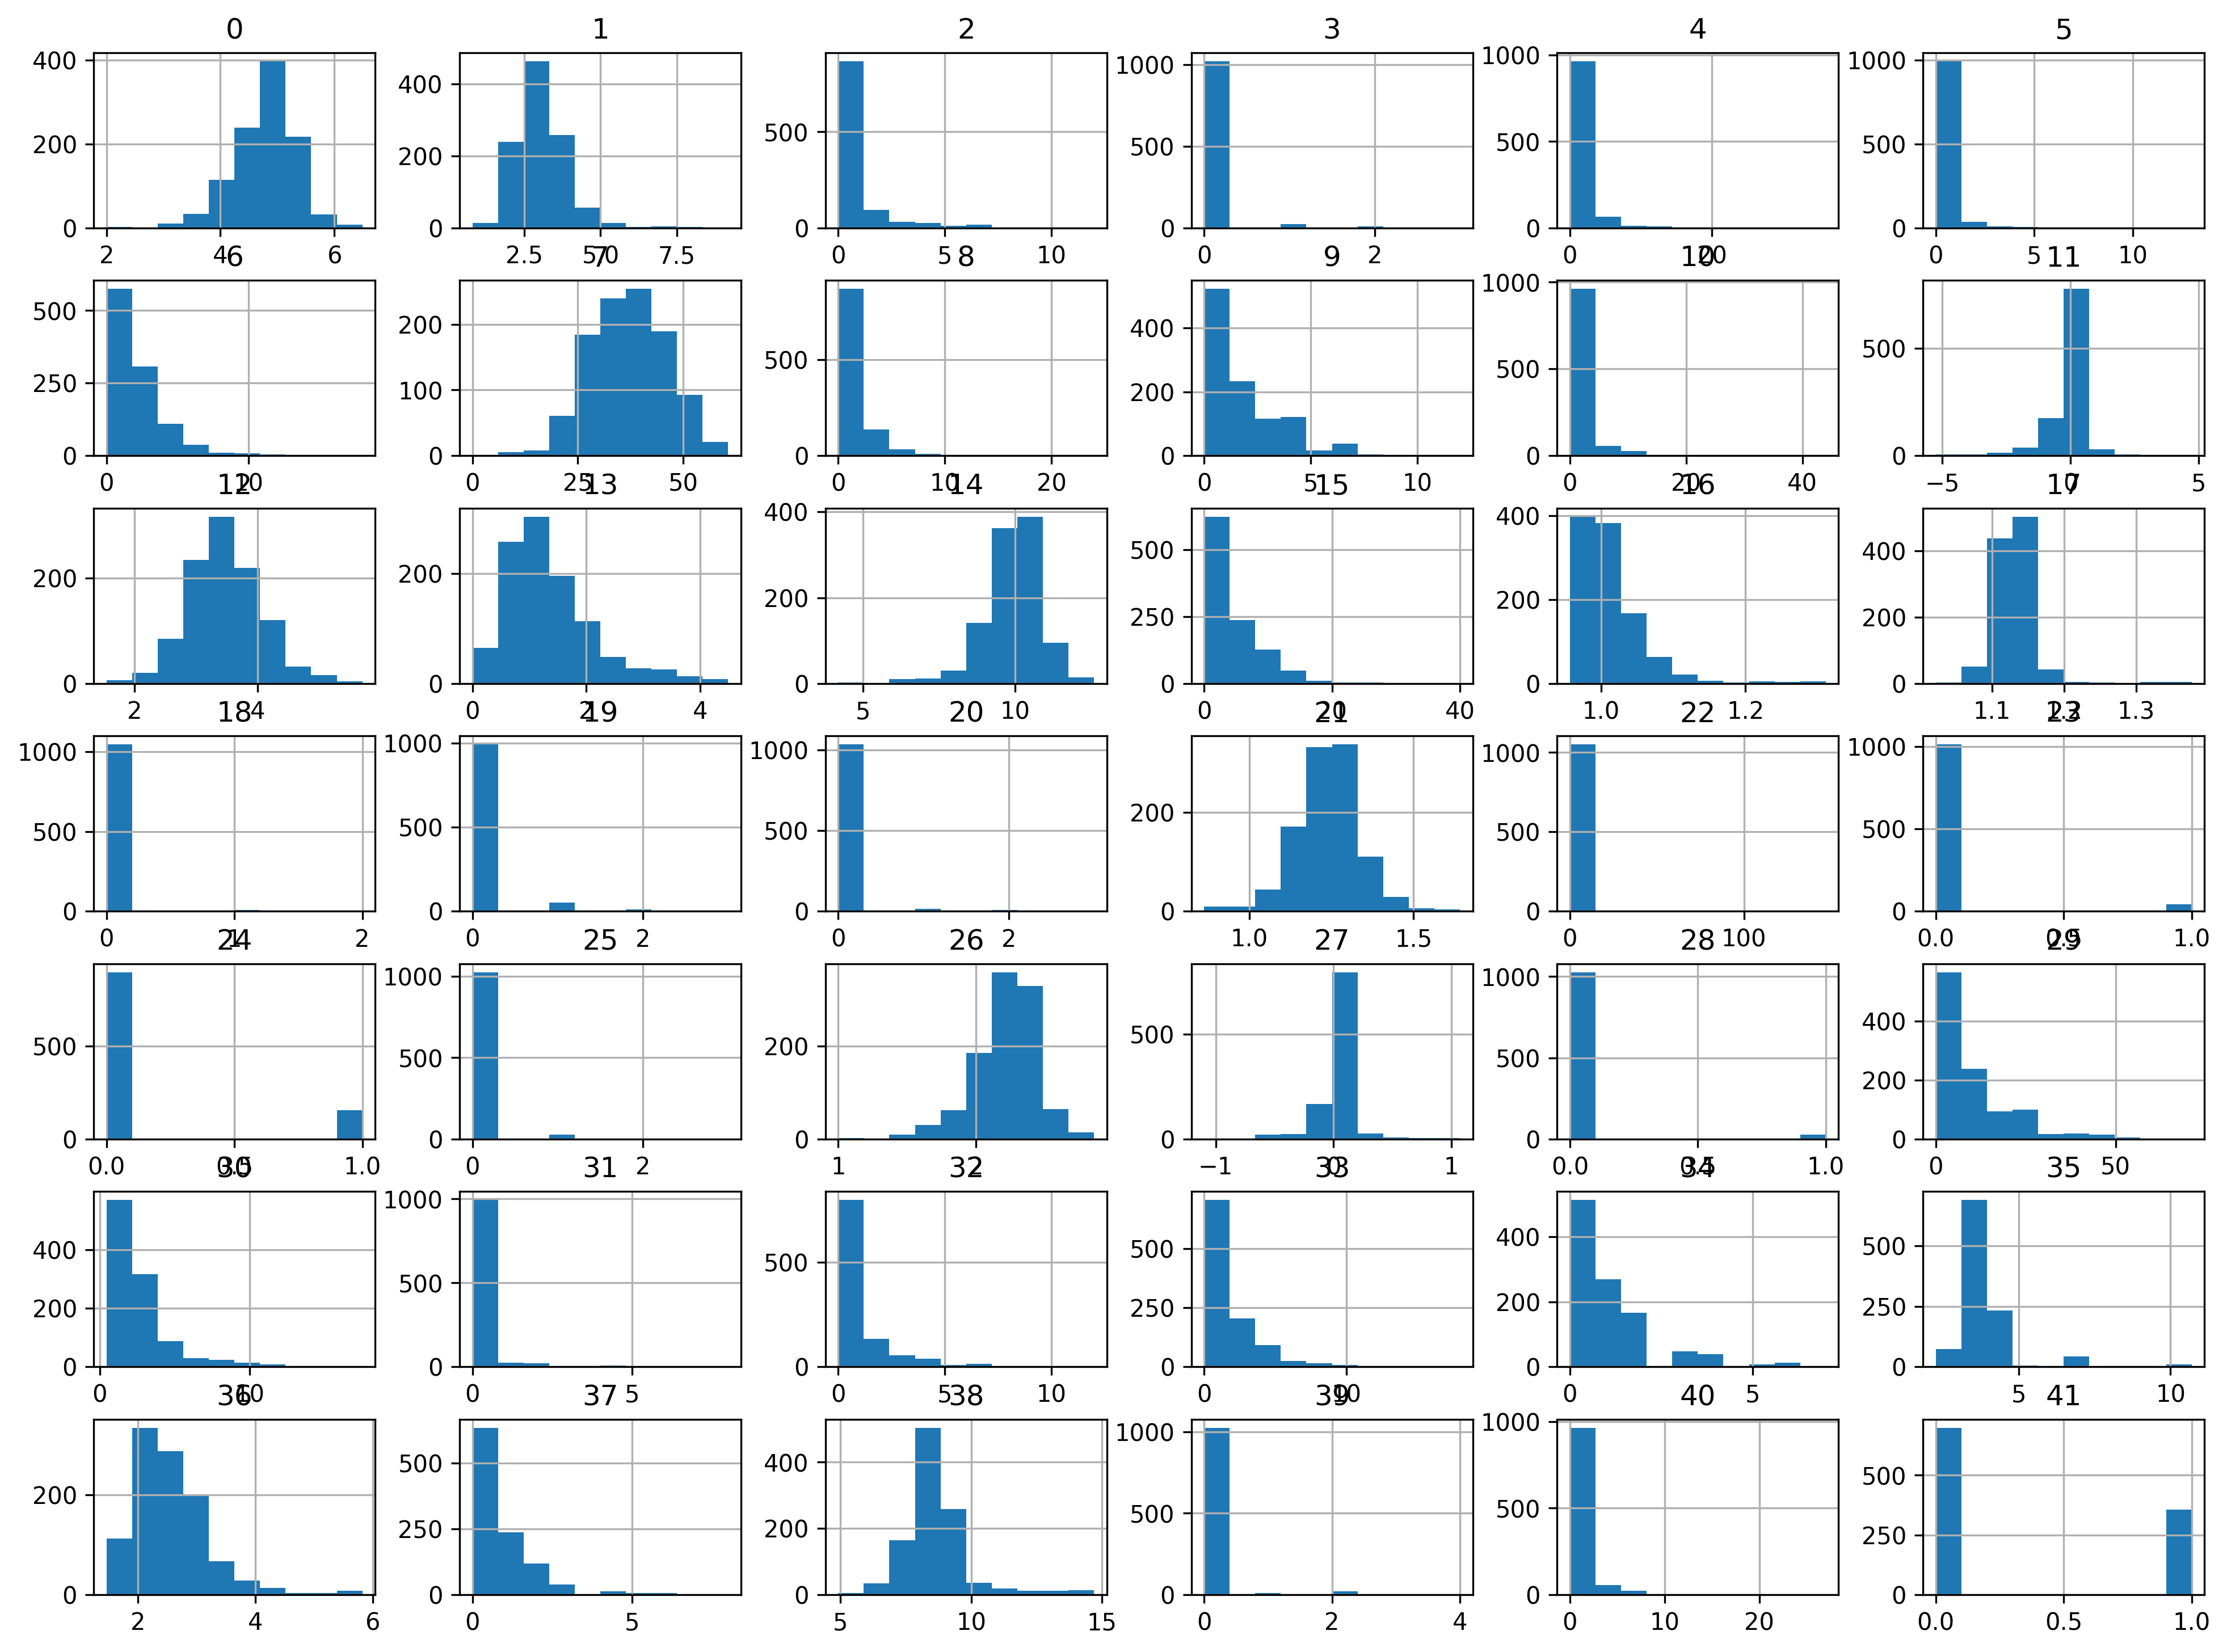

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 300
data.hist()

Seems like there is a lot of interesting feature distributions here for the algorithms to play with.

# Examine the data

Let's see where the unique values are.

In [6]:
data.nunique()

0      440
1     1022
2       11
3        4
4       16
5       13
6       15
7      188
8       15
9       12
10      21
11     384
12     756
13     373
14     510
15      24
16     167
17     125
18       3
19       4
20       4
21     352
22      13
23       2
24       2
25       4
26     329
27     205
28       2
29     470
30     553
31       8
32      11
33      16
34       8
35     705
36     624
37       8
38     862
39       5
40      17
41       2
dtype: int64

## Correlation

Let's see if any columns are very heavily correlated with the class.

In [7]:
data.corr(method='pearson').iloc[:,-1]

0    -0.396138
1    -0.001900
2    -0.299107
3    -0.103290
4    -0.234618
5    -0.170450
6    -0.337268
7    -0.201603
8    -0.056142
9     0.177183
10   -0.242325
11   -0.112425
12   -0.343779
13    0.275321
14   -0.343377
15   -0.002879
16   -0.091520
17    0.131555
18   -0.059831
19   -0.153640
20   -0.096239
21   -0.372254
22   -0.116613
23   -0.114554
24   -0.252103
25   -0.091820
26   -0.389951
27   -0.025022
28   -0.092893
29    0.053636
30    0.173572
31   -0.106590
32   -0.318547
33   -0.268875
34   -0.027387
35   -0.289619
36    0.114896
37   -0.261751
38   -0.366793
39    0.149510
40   -0.214476
41    1.000000
Name: 41, dtype: float64